In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X,y

(array([[-1.16698049, -0.7092792 ],
        [-0.06652951, -1.58332826],
        [-0.65796466,  1.80579922],
        ...,
        [ 0.14929585, -0.4537665 ],
        [ 0.13801357,  1.06833604],
        [ 1.18992467, -0.25669825]]),
 array([-1.46999153e+02, -8.18862665e+01,  3.14957420e+01,  3.68344070e+01,
         1.25723709e+02, -1.46373190e+02,  1.83013092e+02, -1.64109675e+01,
         4.50217805e+01,  9.14588769e+01, -5.92388087e+00, -1.36184100e+02,
        -8.44015784e+01, -3.83466503e+01,  5.82748729e+01, -1.52813646e+02,
        -9.14019086e+01,  4.77032908e+01,  1.53209895e+02,  2.22336276e-02,
        -1.29025867e+02, -6.76883740e+00, -5.86995783e+01,  1.91524007e+02,
         1.72502940e+01,  5.38306219e+01, -4.59523778e+01, -7.95797780e+01,
        -1.41769513e+01, -7.02425854e+00, -9.39641582e+01, -1.54160063e+02,
         4.31753150e+01, -4.79104397e+01,  1.07965480e+02, -7.58317898e+01,
        -2.65407655e+00, -8.71348678e+01, -2.71238299e+00,  1.02117662e+02,
         

In [5]:
pd.DataFrame(X)[0]

0     -1.166980
1     -0.066530
2     -0.657965
3      0.813231
4      1.103228
         ...   
995    1.784757
996    0.020975
997    0.149296
998    0.138014
999    1.189925
Name: 0, Length: 1000, dtype: float64

c:\Users\mannu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mannu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mannu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='0', ylabel='1'>

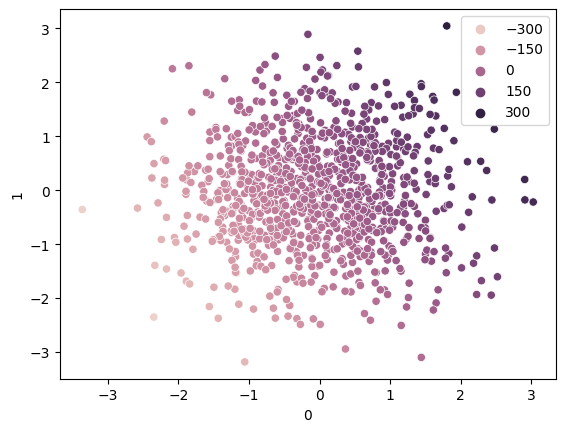

In [6]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [12]:
from sklearn.svm import SVR

In [13]:
svr=SVR(kernel='linear')

In [14]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [15]:
svr.coef_

array([[88.6202541 , 50.55012567]])

In [16]:
y_pred=svr.predict(X_test)

In [17]:
y_pred

array([-9.02751878e+00,  1.35629067e+02, -1.07688678e+02,  4.19684298e+01,
        1.22190165e+01, -1.41547628e+02, -9.07595973e+01,  3.37353829e+01,
       -1.29584392e+02, -4.16672946e+01,  1.73166685e+01, -7.59849623e+00,
       -1.20169794e+02, -1.57198211e+02,  5.21021841e+01,  2.70317700e+00,
       -5.64042469e-01,  9.60111773e+01, -3.29088920e+01,  1.38960177e+02,
       -1.70113024e+02, -2.16899478e+01,  6.68034840e+01, -1.41495930e+01,
        1.51256935e+02, -8.61464261e+01,  7.66496238e+01,  2.94963600e+01,
        1.17394573e+02, -2.66539072e+01,  7.32928573e+01,  4.24477709e+01,
       -1.40396634e+01,  5.65673905e+01, -2.03877888e+02,  1.38417058e+02,
       -2.59119098e+01,  5.27290374e+01,  9.80780366e+01, -9.21277287e+01,
       -1.14104737e+02, -1.45537297e+02, -1.12074821e+02, -8.05330763e+01,
       -3.80480230e+01,  1.50593166e+02,  9.94839151e+01,  8.86202613e+01,
       -1.23874547e+02,  1.81843376e+02, -7.86308698e+01, -1.28074710e+02,
       -8.11402572e+01,  

In [18]:
from sklearn.metrics import r2_score

In [19]:
print(r2_score(y_test,y_pred))

0.9989024744144048


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1,10,100,1000],
              'gamma': [1,1.0,0.01,0.001,0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
             }

In [26]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [27]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.683 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.719 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.710 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.724 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.717 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1.0, kernel=linear;, score=0.683 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1.0, kernel=linear;, score=0.719 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1.0, kernel=linear;, score=0.710 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1.0, kernel=linear;, score=0.724 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1.0, kernel=linear;, score=0.717 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 1.0, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [31]:
grid.best_params_

{'C': 1000, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [32]:
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9989300786972238
